In [32]:
import numpy as np
import pandas as pd
from pandas_datareader import DataReader
from pykalman import KalmanFilter
import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = 8, 6

In [33]:
# get adjusted close prices from Yahoo
secs = ['EWA', 'EWC']
data = DataReader(secs, 'yahoo', '2015-1-1', '2019-07-16')['Adj Close']
data.tail()

Symbols,EWA,EWC
Date,,
2019-07-10,22.500000,28.969999
2019-07-11,22.570000,28.990000
2019-07-12,22.610001,28.990000
2019-07-15,22.639999,28.980000
2019-07-16,22.490000,28.910000


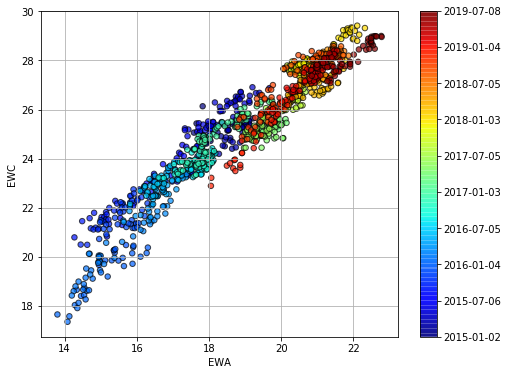

In [36]:
# visualize the correlation between assest prices over time
cm = plt.cm.get_cmap('jet')
dates = [str(p.date()) for p in data[::len(data)//10].index]
colors = np.linspace(0.1, 1, len(data))
sc = plt.scatter(data[data.columns[0]], data[data.columns[1]], s=30, c=colors, cmap=cm, edgecolor='k', alpha=0.7)
cb = plt.colorbar(sc)
cb.ax.set_yticklabels([str(p.date()) for p in data.index[::int(len(data)/9.0)]]);
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1]);
plt.grid()

In [24]:
delta = 1e-5
trans_cov = delta / (1 - delta) * np.eye(2)
obs_mat = np.vstack([data.EWA, np.ones(data.EWA.shape)]).T[:, np.newaxis]

In [25]:
kf = KalmanFilter(n_dim_obs=1, n_dim_state=2,
                  initial_state_mean=np.zeros(2),
                  initial_state_covariance=np.ones((2, 2)),
                  transition_matrices=np.eye(2),
                  observation_matrices=obs_mat,
                  observation_covariance=1.0,
                  transition_covariance=trans_cov)

In [26]:
state_means, state_covs = kf.filter(data.EWC.values)

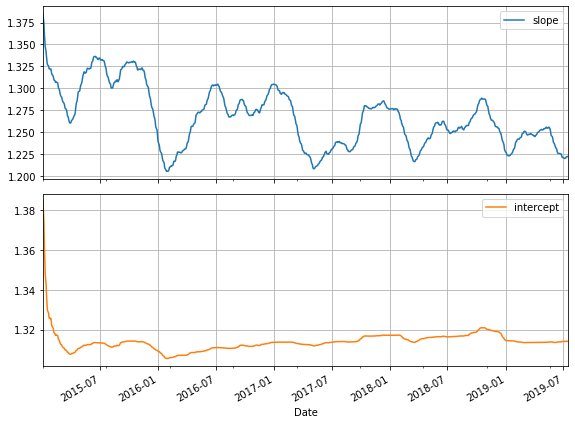

In [29]:
pd.DataFrame(dict(slope=state_means[:, 0], intercept=state_means[:, 1]), index=data.index).plot(subplots=True, grid=True)
plt.tight_layout();
plt.grid(True)

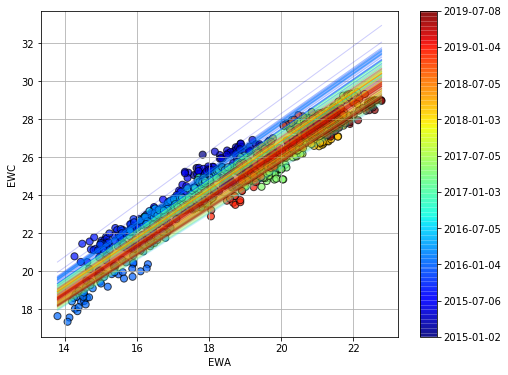

In [38]:
# visualize the correlation between assest prices over time
cm = plt.cm.get_cmap('jet')
dates = [str(p.date()) for p in data.index[::int(len(data)/10.0)]]
colors = np.linspace(0.1, 1, len(data))
sc = plt.scatter(data[data.columns[0]], data[data.columns[1]], s=50, c=colors, cmap=cm, edgecolor='k', alpha=0.7)
cb = plt.colorbar(sc)
cb.ax.set_yticklabels([str(p.date()) for p in data[::len(data)//9].index]);
plt.xlabel(data.columns[0])
plt.ylabel(data.columns[1])

# add regression lines
step = 5
xi = np.linspace(data[data.columns[0]].min(), data[data.columns[0]].max(), 2)
colors_l = np.linspace(0.1, 1, len(state_means[::step]))
for i, beta in enumerate(state_means[::step]):
    plt.plot(xi, beta[0] * xi + beta[1], alpha=.2, lw=1, c=cm(colors_l[i]))
plt.grid(True)